<a href="https://colab.research.google.com/github/nyla111/loan-dataset-mining/blob/main/ida_a2_26130563.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Exploration & Preprocessing  

This notebook contains a **complete data analysis and preprocessing workflow** for a loan dataset, completed as part of an academic assignment in data mining and analytics.

## Project Overview  
The task simulates a real-world scenario where a data analyst explores and prepares a loan dataset for further modeling. The work includes:

- **Initial data exploration** (attribute typing, statistical summaries, visualizations)
- **Missing value analysis** and impact assessment
- **Data preprocessing** using binning, normalization, discretization, and binarization
- **Tool-based exploration** using Python libraries for outlier detection, clustering, and pattern identification

## Skills & Tools Demonstrated  
- **Python:** Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn  
- **Data Cleaning:** Handling missing values, outlier detection  
- **Exploratory Data Analysis (EDA):** Statistical summaries, distribution visualizations  
- **Feature Engineering:** Binning, normalization, discretization, binarization  
- **Data Visualization:** Histograms, boxplots, frequency tables  
- **Workflow Documentation:** Jupyter Notebook with clear markdown and code separation

## Structure  
The notebook is organized by assignment tasks:

1. **A1-A3:** Initial data exploration  
2. **B1-B4:** Data preprocessing tasks  
3. **C:** Summary of findings

## Purpose  
This project showcases foundational **data preprocessing and exploratory analysis skills**, essential for roles in **Data Science, Machine Learning, and Business Intelligence**. It demonstrates the ability to transform raw data into actionable insights through systematic and reproducible analysis.

---

**Keywords:** `Data Preprocessing`, `EDA`, `Python`, `Pandas`, `Data Visualization`, `Feature Engineering`, `Jupyter Notebook`, `Data Cleaning`, `Statistical Analysis`

## Setup and Load Dataset <font color='white'>{-}</font>

```pip install pandas numpy matplotlib openpyxl seaborn scikit-learn```

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Plot style
sns.set_theme(rc={'figure.dpi':120})

In [ ]:
# Dataset
INPUT_FILE = "./dataset.xlsx"
xls = pd.ExcelFile(INPUT_FILE)
df = pd.read_excel(INPUT_FILE, sheet_name=0)

In [ ]:
print("Rows, cols:", df.shape)
df.head()


Rows, cols: (3264, 20)


,UniqueID,disbursed_amount,asset_cost,branch_id,Employment.Type,DisbursalDate,State_ID,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.CURRENT.BALANCE,SEC.NO.OF.ACCTS,PRIMARY.INSTAL.AMT,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Age,marital status
0,555004,70837,93924,103,Salaried,2018-10-03,7,0,0,478,8,650906,0,2238,1,3yrs 3mon,0,0,35,Married
1,420858,59913,72378,2,Self employed,2018-08-04,4,0,0,726,9,77232,0,8054,1,2yrs 0mon,1,0,57,Single
2,504875,36939,62675,79,Self employed,2018-09-14,18,0,0,0,0,0,0,0,0,0yrs 0mon,0,0,53,Divorced
3,608293,45645,74829,70,Self employed,2018-10-23,4,0,0,0,0,0,0,0,0,0yrs 0mon,0,0,42,Single
4,506325,46349,74194,74,Self employed,2018-09-14,4,0,0,738,1,9000,0,0,0,0yrs 7mon,0,1,34,Single


# A. Initial data exploration

## A1. Identify Attribute Types <font color='white'>{.unnumbered}</font>

In [ ]:
df.dtypes

UniqueID                                        int64
disbursed_amount                                int64
asset_cost                                      int64
branch_id                                       int64
Employment.Type                                object
DisbursalDate                          datetime64[ns]
State_ID                                        int64
Driving_flag                                    int64
Passport_flag                                   int64
PERFORM_CNS.SCORE                               int64
PRI.NO.OF.ACCTS                                 int64
PRI.CURRENT.BALANCE                             int64
SEC.NO.OF.ACCTS                                 int64
PRIMARY.INSTAL.AMT                              int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS             int64
CREDIT.HISTORY.LENGTH                          object
NO.OF_INQUIRIES                                 int64
loan_default                                    int64
Age                         

## A2. Statistical Summary <font color='white'>{-}</font>

For numeric attributes compute: count, mean, median, std, min, max, variance, percentiles (25/50/75).  
For categorical attributes compute: freq table, mode, and number of unique values.  
Show at least one distribution plot per numeric attribute type (histogram or boxplot).
Also: explicitly show missing-value counts and demonstrate how missing values affect a selected statistic (example: mean of asset_cost before/after handling missing).

First, since `CREDIT.HISTORY.LENGTH` is given in a text format like `"3yrs 4mon"`, I converted it into a numeric column representing the total **months of credit history**

In [ ]:
def credit_length_to_months(s):
    """Convert 'x yrs y mon' to total months."""
    if pd.isna(s):
        return np.nan
    match = re.search(r'(?:(\d+)\s*yrs?)?\s*(?:(\d+)\s*mon)?', str(s))
    if not match:
        return np.nan
    yrs = int(match.group(1)) if match.group(1) else 0
    mons = int(match.group(2)) if match.group(2) else 0
    return yrs * 12 + mons

df['CREDIT_HISTORY_Months'] = df['CREDIT.HISTORY.LENGTH'].apply(credit_length_to_months)

df[['CREDIT.HISTORY.LENGTH', 'CREDIT_HISTORY_Months']].head(10)


,CREDIT.HISTORY.LENGTH,CREDIT_HISTORY_Months
0,3yrs 3mon,39
1,2yrs 0mon,24
2,0yrs 0mon,0
3,0yrs 0mon,0
4,0yrs 7mon,7
5,0yrs 0mon,0
6,8yrs 8mon,104
7,2yrs 10mon,34
8,0yrs 0mon,0
9,4yrs 7mon,55


### Numeric summary

In [ ]:
numeric = df.select_dtypes(include=['number']).copy()
num_descr = numeric.describe().T
num_descr['variance'] = numeric.var()
num_descr['median'] = numeric.median()
display(num_descr.sort_index())

,count,mean,std,min,25%,50%,75%,max,variance,median
Age,3264.0,40.708640,9.720834e+00,24.0,33.0,39.0,47.00,75.0,9.449461e+01,39.0
CREDIT_HISTORY_Months,3264.0,16.172488,2.809834e+01,0.0,0.0,0.0,23.00,188.0,7.895170e+02,0.0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,3264.0,0.103860,4.067283e-01,0.0,0.0,0.0,0.00,8.0,1.654279e-01,0.0
Driving_flag,3264.0,0.024510,1.546493e-01,0.0,0.0,0.0,0.00,1.0,2.391640e-02,0.0
NO.OF_INQUIRIES,3264.0,0.233456,7.945776e-01,0.0,0.0,0.0,0.00,12.0,6.313535e-01,0.0
PERFORM_CNS.SCORE,3264.0,294.398591,3.390487e+02,0.0,0.0,15.0,679.00,859.0,1.149540e+05,15.0
PRI.CURRENT.BALANCE,3264.0,179627.915748,1.162544e+06,-95000.0,0.0,0.0,37780.00,39605136.0,1.351509e+12,0.0
PRI.NO.OF.ACCTS,3264.0,2.501532,5.735299e+00,0.0,0.0,1.0,3.00,148.0,3.289365e+01,1.0
PRIMARY.INSTAL.AMT,3264.0,11696.853860,6.904554e+04,0.0,0.0,0.0,2312.50,1615620.0,4.767287e+09,0.0
Passport_flag,3264.0,0.002145,4.626731e-02,0.0,0.0,0.0,0.00,1.0,2.140664e-03,0.0


For continuous attributes like Age, disbursed_amount, and asset_cost, I used histograms to understand distributions and boxplots to detect outliers. Not every visualization is meaningful, so I used my own judgement to choose which one to be included in the report.

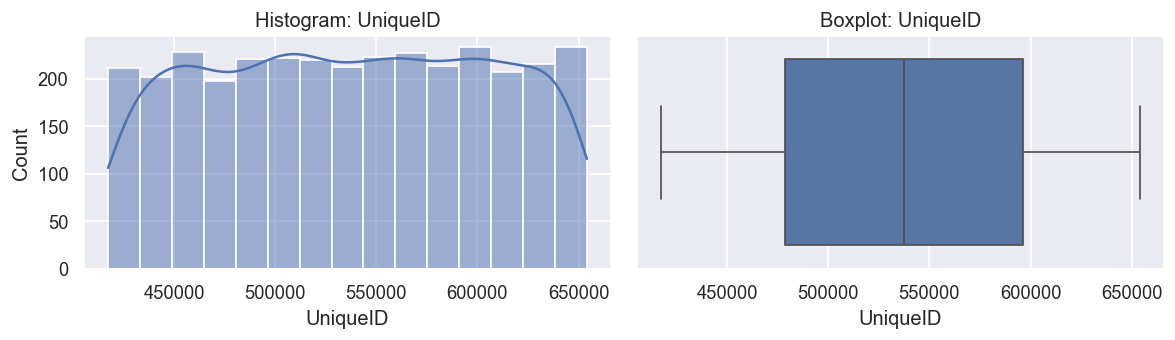

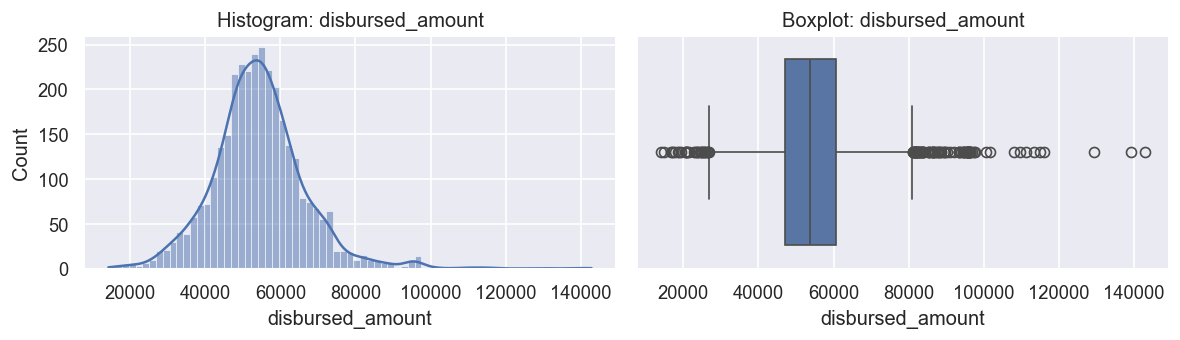

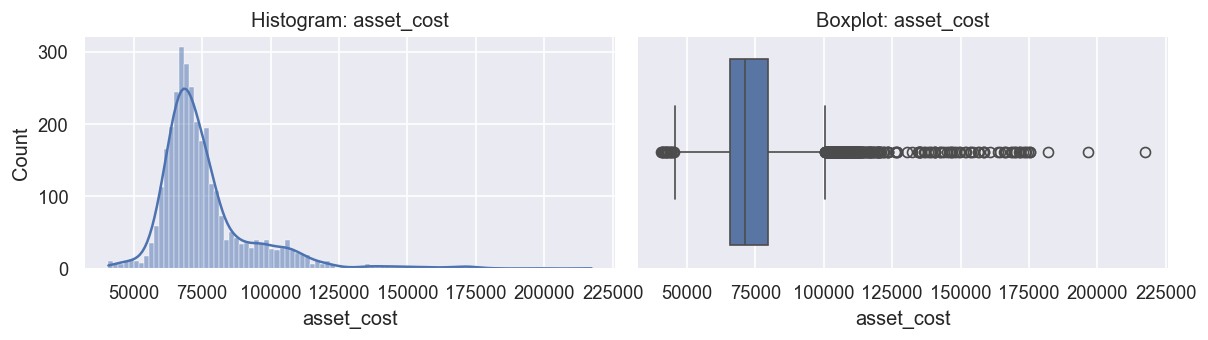

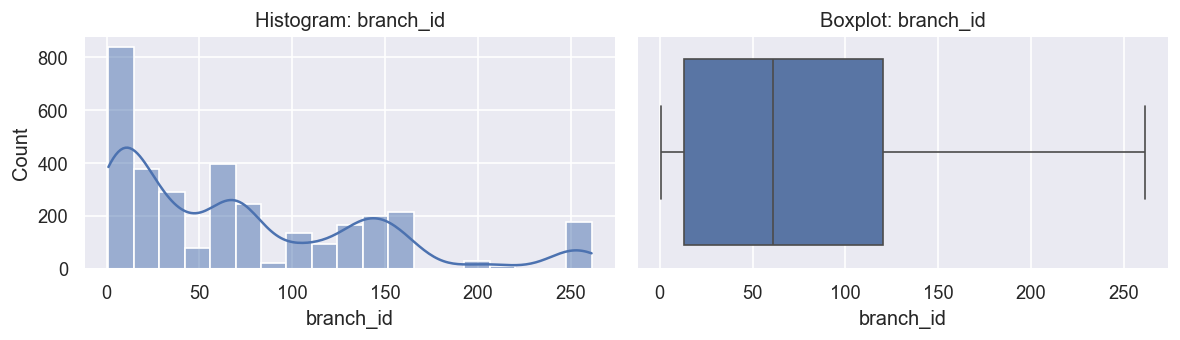

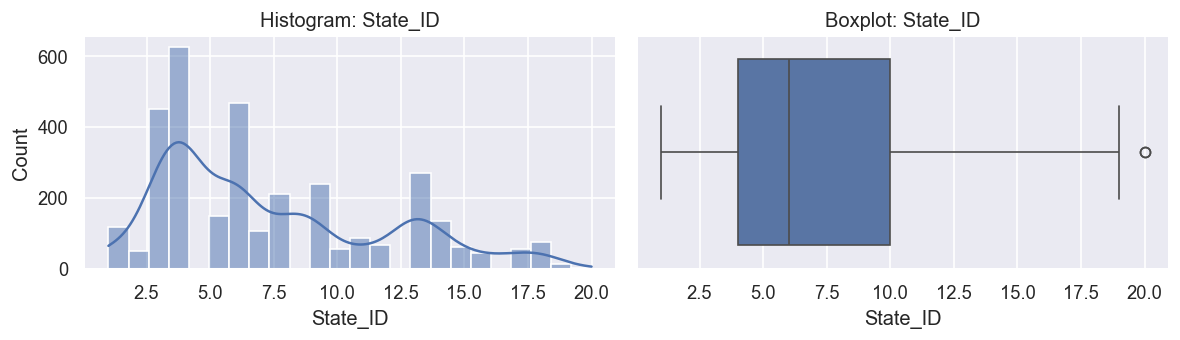

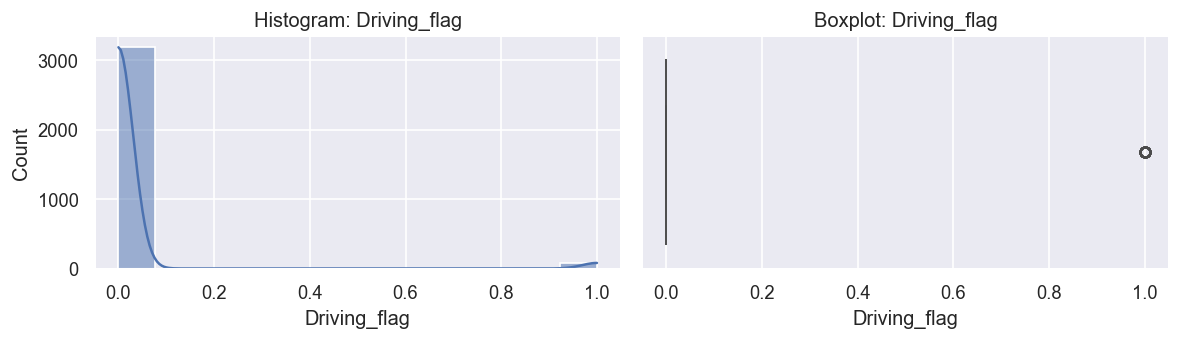

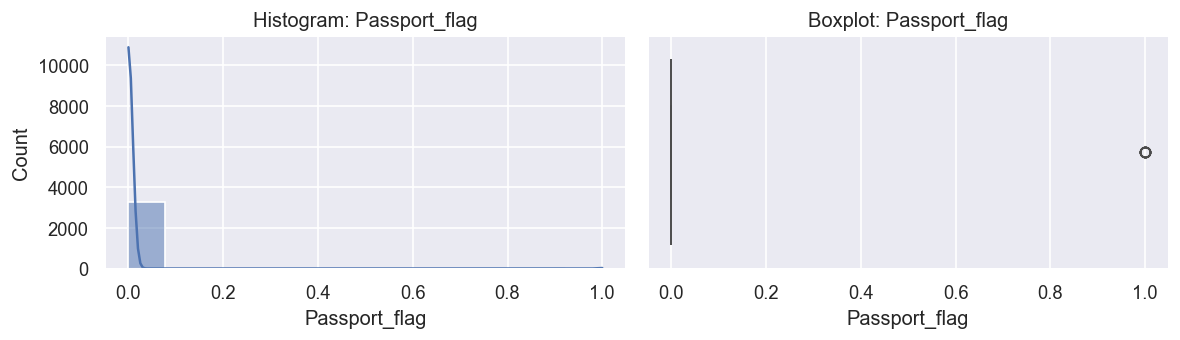

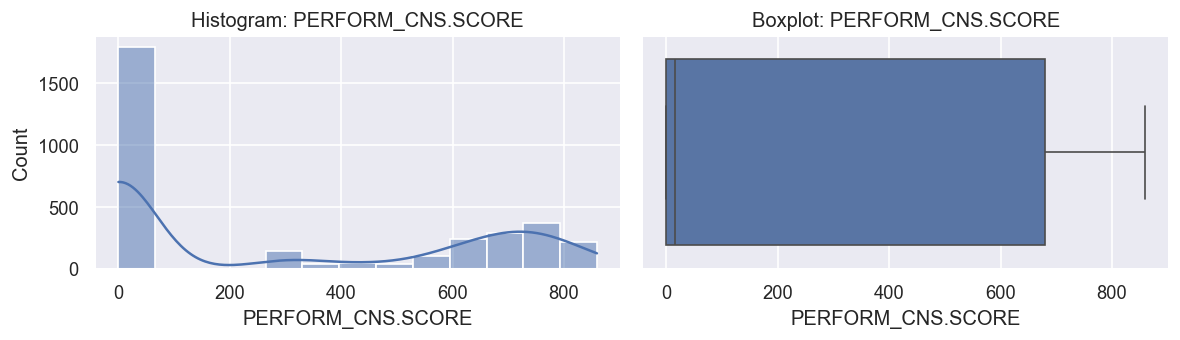

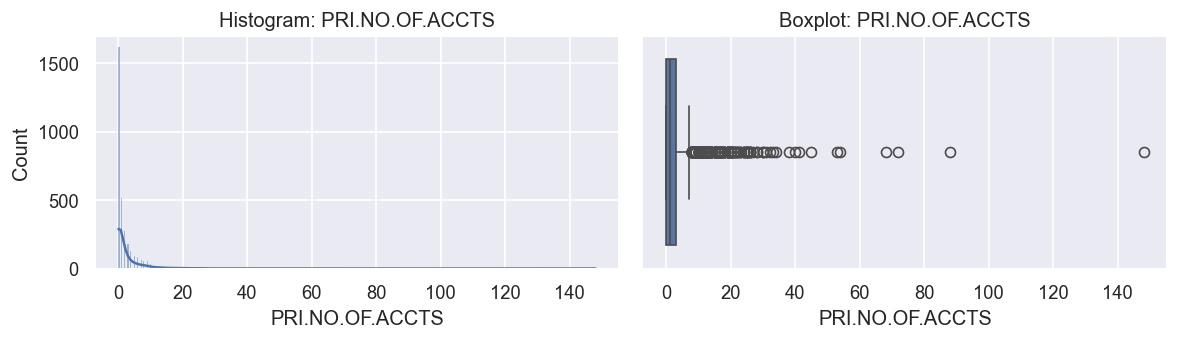

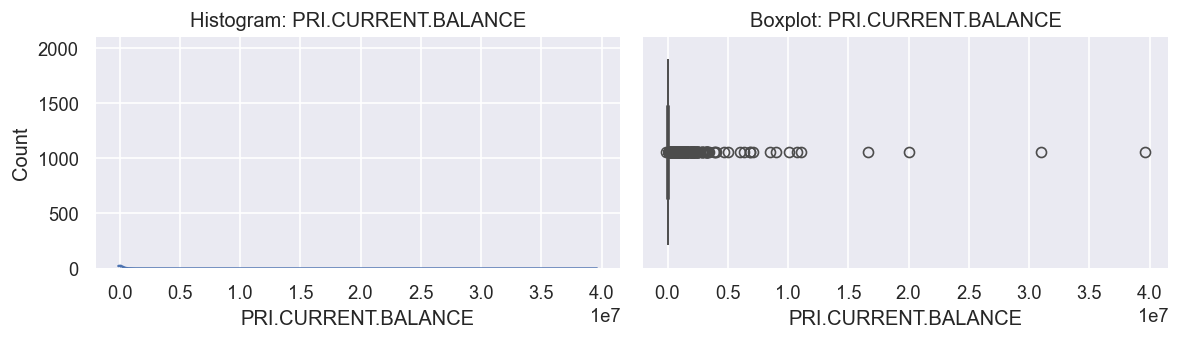

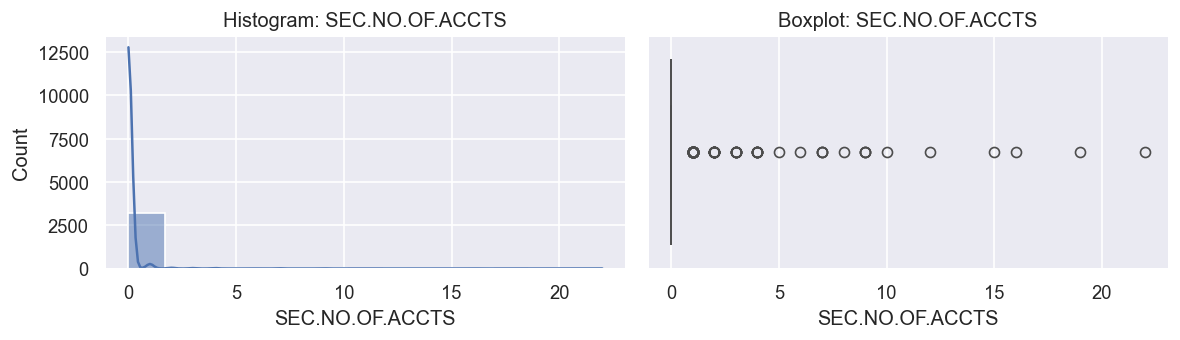

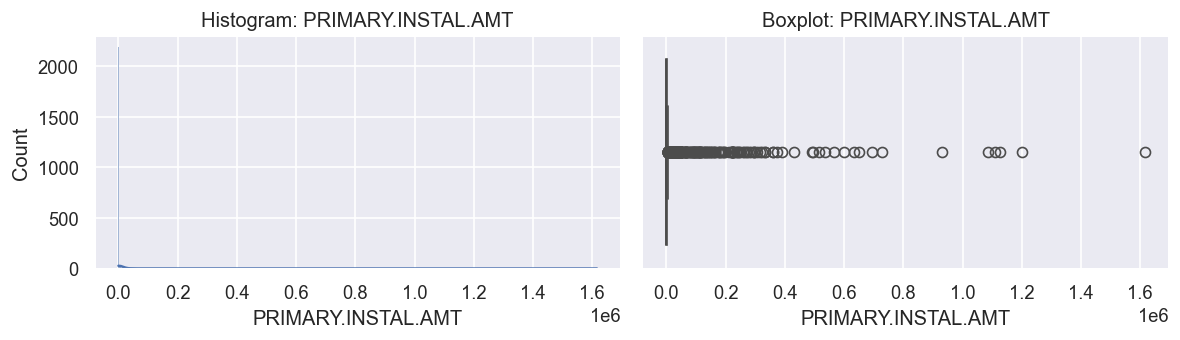

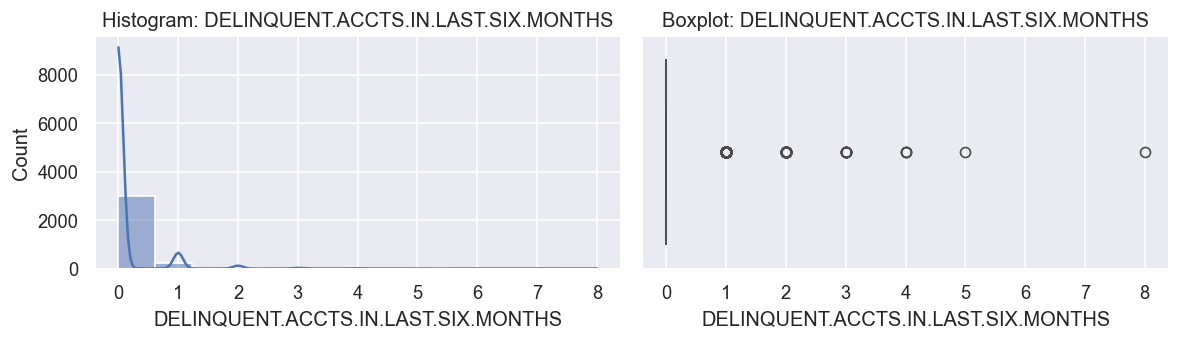

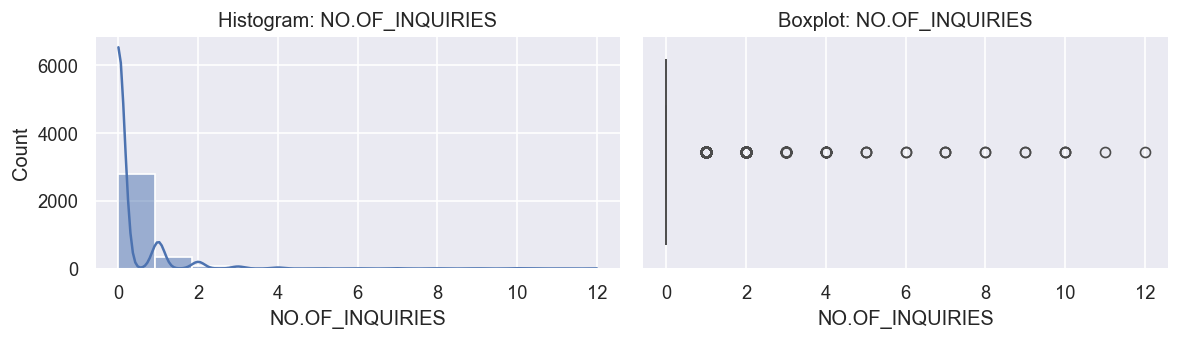

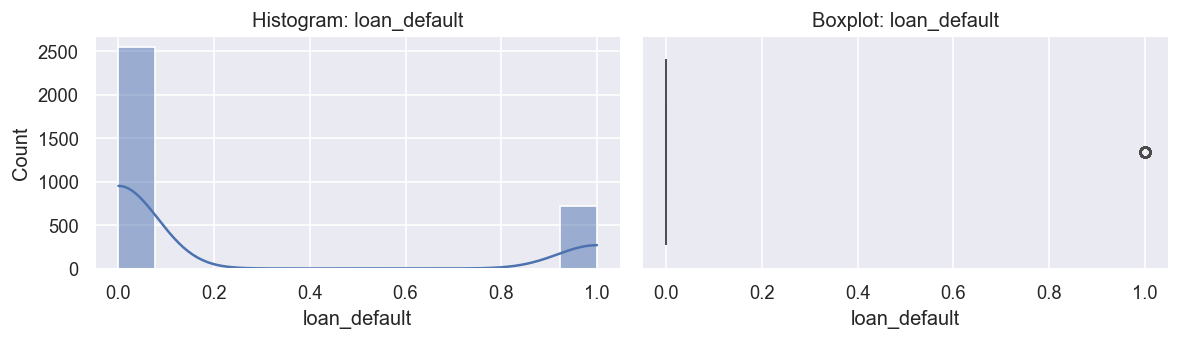

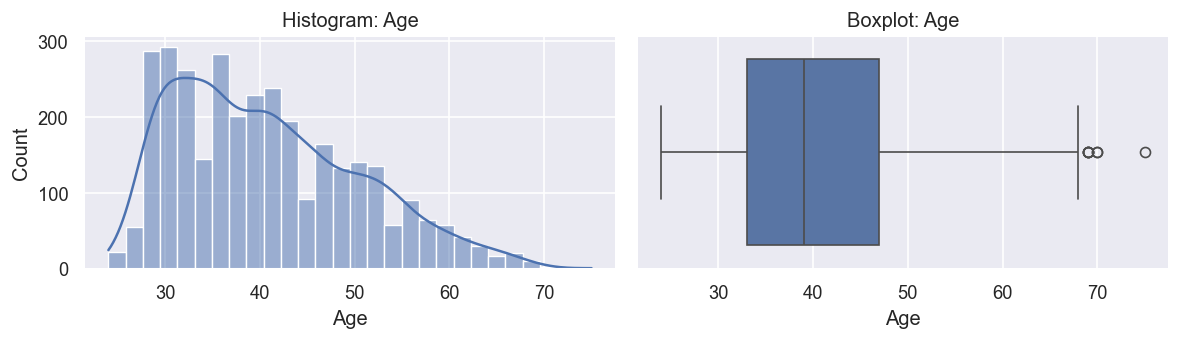

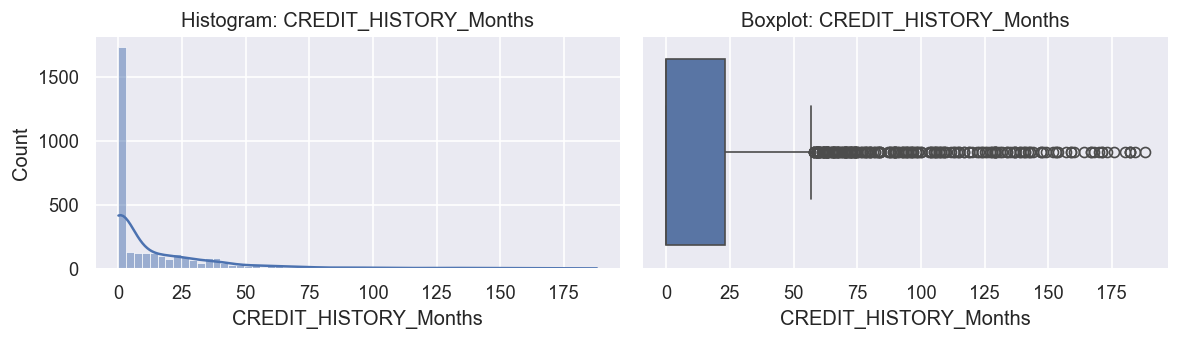

In [ ]:
# Histograms + boxplots
num_cols = numeric.columns.tolist()
for c in num_cols:
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    sns.histplot(df[c].dropna(), kde=True)
    plt.title(f'Histogram: {c}')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[c])
    plt.title(f'Boxplot: {c}')
    plt.tight_layout()
    plt.show()

### Categorical summary

In [ ]:
# cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
cat_cols = [c for c in df.columns if (df[c].dtype == 'object' or df[c].dtype.name == 'category'
                                      or df[c].nunique() < 20 and not pd.api.types.is_float_dtype(df[c]))]
print("Categorical columns:", cat_cols)

Categorical columns: ['Employment.Type', 'Driving_flag', 'Passport_flag', 'SEC.NO.OF.ACCTS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default', 'marital status']


Since we cannot perform statistical summary on those categorical attributes, I only chose to show each's mode (the value that appear the msot in the dataset):

In [ ]:
for c in cat_cols:
    mode_val = df[c].mode(dropna=False)[0]   # first mode (handles ties automatically)
    mode_count = df[c].value_counts(dropna=False).iloc[0]
    print(f"{c:40} | Mode: {mode_val} (Count = {mode_count})")

Employment.Type                          | Mode: Self employed (Count = 1808)
Driving_flag                             | Mode: 0 (Count = 3184)
Passport_flag                            | Mode: 0 (Count = 3257)
SEC.NO.OF.ACCTS                          | Mode: 0 (Count = 3162)
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS      | Mode: 0 (Count = 2999)
CREDIT.HISTORY.LENGTH                    | Mode: 0yrs 0mon (Count = 1642)
NO.OF_INQUIRIES                          | Mode: 0 (Count = 2790)
loan_default                             | Mode: 0 (Count = 2545)
marital status                           | Mode: Single (Count = 1388)


For categorical attributes, I used bar charts or pie charts to visualize.


=== Employment.Type ===
Unique categories: 3
Employment.Type
Self employed    1808
Salaried         1351
NaN               105
Name: count, dtype: int64


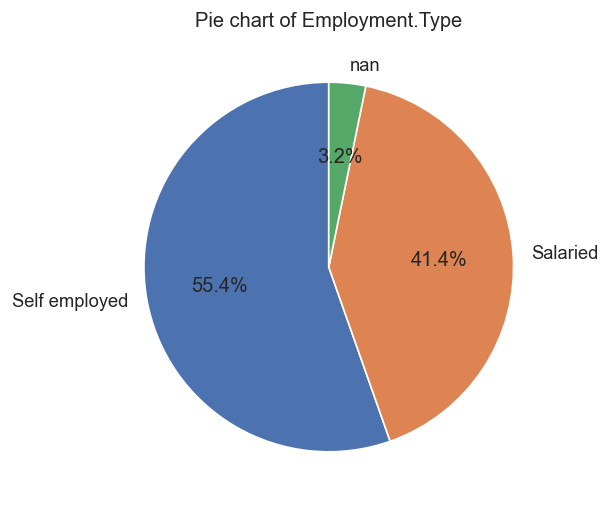


=== Driving_flag ===
Unique categories: 2
Driving_flag
0    3184
1      80
Name: count, dtype: int64


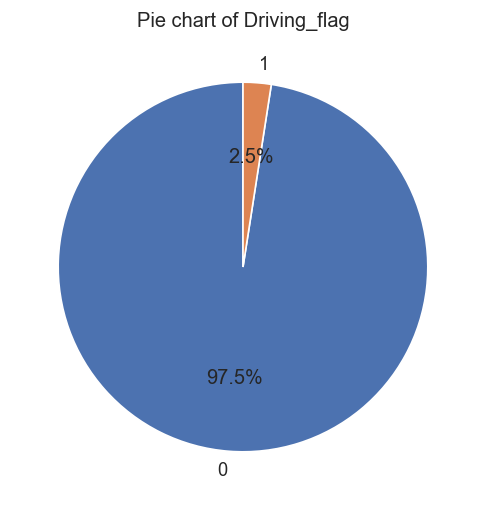


=== Passport_flag ===
Unique categories: 2
Passport_flag
0    3257
1       7
Name: count, dtype: int64


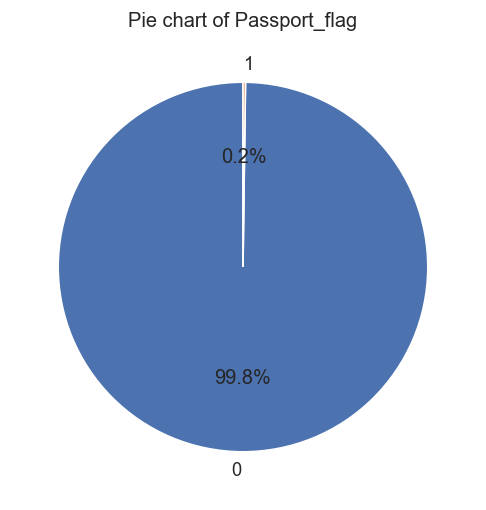


=== SEC.NO.OF.ACCTS ===
Unique categories: 16
SEC.NO.OF.ACCTS
0    3162
1      65
2      10
3       6
4       6
Name: count, dtype: int64


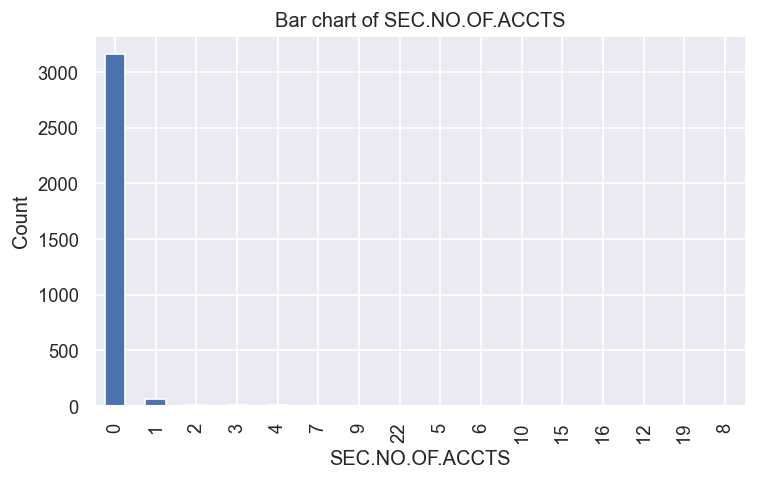


=== DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS ===
Unique categories: 7
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS
0    2999
1     214
2      38
3       8
4       3
Name: count, dtype: int64


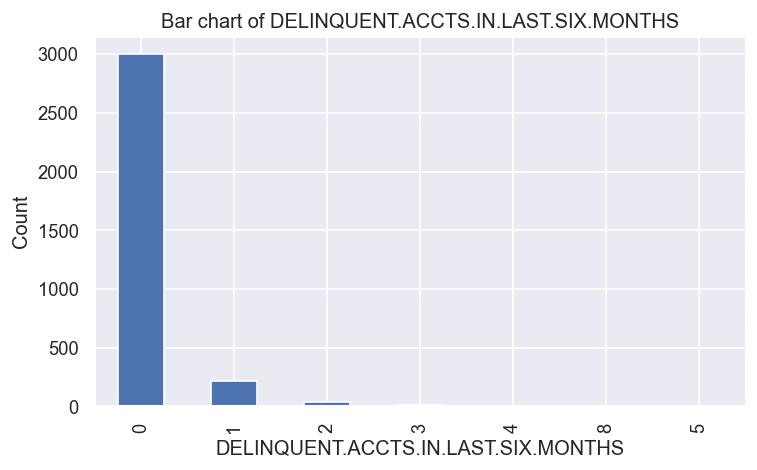


=== CREDIT.HISTORY.LENGTH ===
Unique categories: 155
CREDIT.HISTORY.LENGTH
0yrs 0mon    1642
0yrs 7mon      56
2yrs 0mon      56
2yrs 1mon      55
0yrs 6mon      55
Name: count, dtype: int64


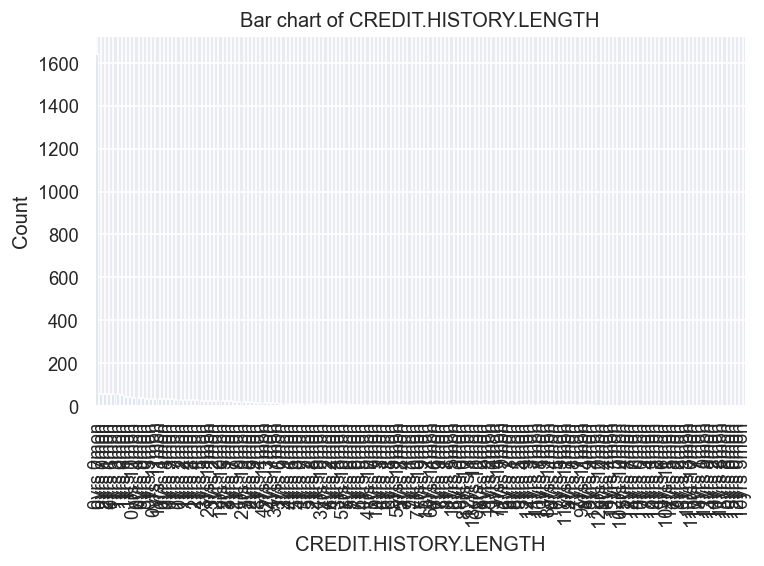


=== NO.OF_INQUIRIES ===
Unique categories: 13
NO.OF_INQUIRIES
0    2790
1     336
2      84
3      25
4      12
Name: count, dtype: int64


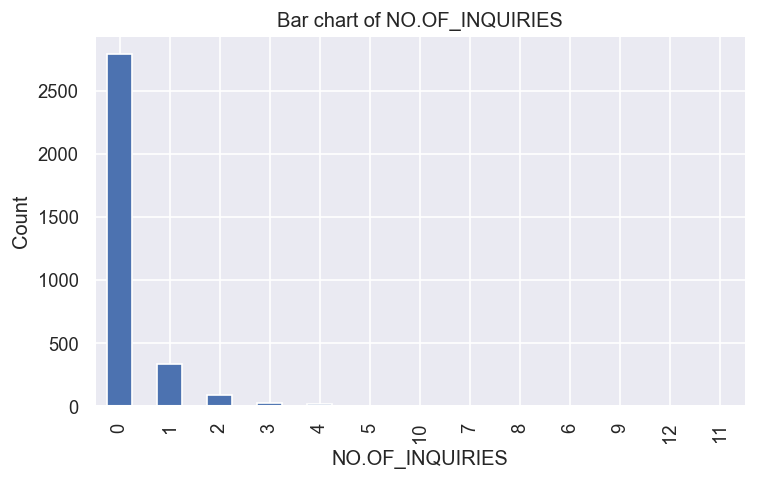


=== loan_default ===
Unique categories: 2
loan_default
0    2545
1     719
Name: count, dtype: int64


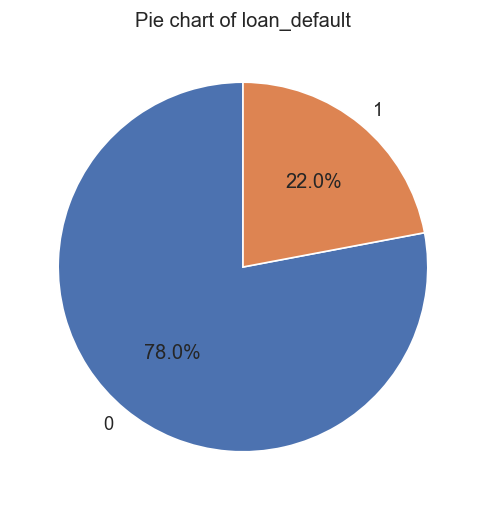


=== marital status ===
Unique categories: 3
marital status
Single      1388
Married     1072
Divorced     804
Name: count, dtype: int64


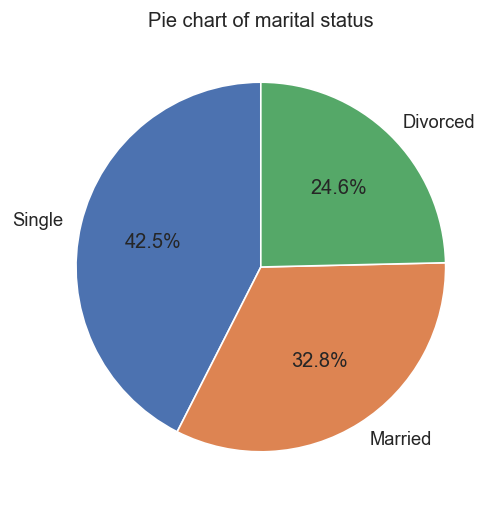

In [ ]:
for c in cat_cols:
    counts = df[c].value_counts(dropna=False)
    n_unique = df[c].nunique(dropna=False)

    print(f"\n=== {c} ===")
    print("Unique categories:", n_unique)
    print(counts.head())

    if n_unique <= 5:
        # Pie chart for very few categories
        plt.figure(figsize=(5,5))
        counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
        plt.title(f"Pie chart of {c}")
        plt.ylabel("")
        plt.show()
    else:
        # Bar chart for more categories
        plt.figure(figsize=(7,4))
        counts.plot(kind='bar')
        plt.title(f"Bar chart of {c}")
        plt.ylabel("Count")
        plt.show()

### Missing values analysis

In [ ]:
missing_counts = df.isnull().sum().sort_values(ascending=False)
print("\nColumns having null values:")
display(missing_counts[missing_counts>0])


Columns having null values:


Employment.Type    105
dtype: int64

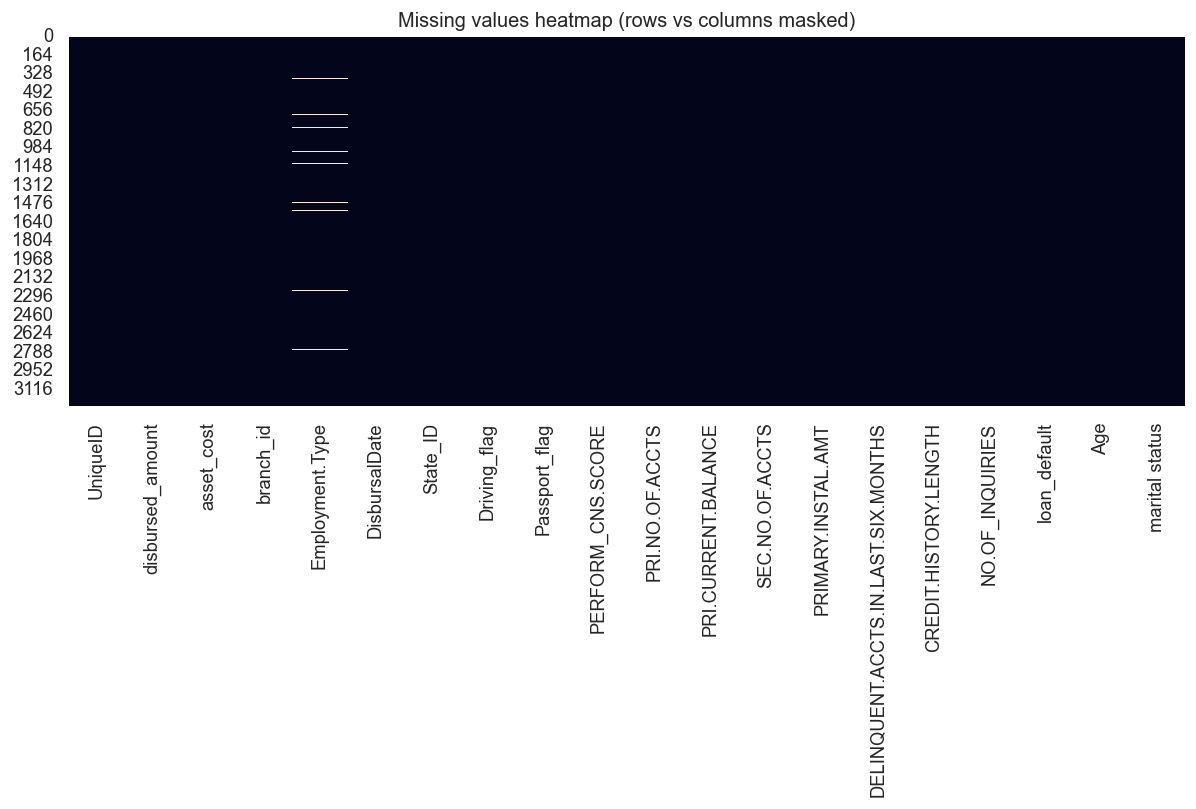

In [ ]:
# Visualization
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing values heatmap (rows vs columns masked)")
plt.show()

Since Employment.Type is a categorical variable, imputing missing values does not directly affect numerical descriptive statistics (e.g., mean, variance). The simplest approach would be replacing missing values with the most frequent category (Self-employed in this dataset), but it risks inflating the dominant class.

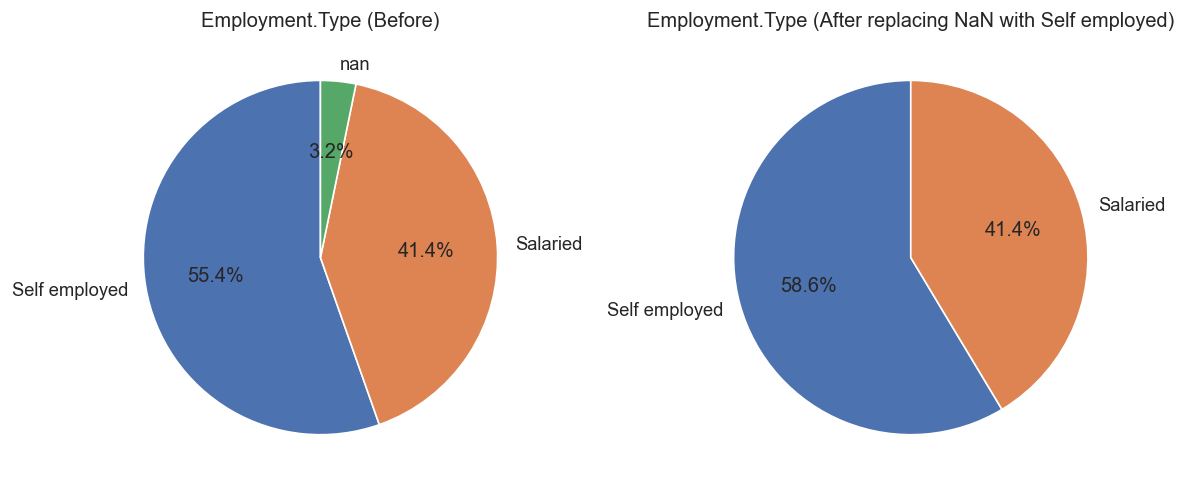

In [ ]:
col = "Employment.Type"

# Before (with NaN)
counts_before = df[col].value_counts(dropna=False)

# After
df[col] = df[col].fillna("Self employed")
counts_after = df[col].value_counts(dropna=False)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].pie(counts_before, labels=counts_before.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title("Employment.Type (Before)")

axes[1].pie(counts_after, labels=counts_after.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title("Employment.Type (After replacing NaN with Self employed)")

plt.tight_layout()
plt.show()


## A3. Data Exploration
Required visuals for the report:
- At least one boxplot showing an outlier (we already have boxplots above; choose one)
- Correlation heatmap (numeric attributes)
- One clustering result (use elbow method and show cluster projection via PCA)
Also include comments about any recoding you did (e.g., converting credit history text -> months).

### Correlation heatmap

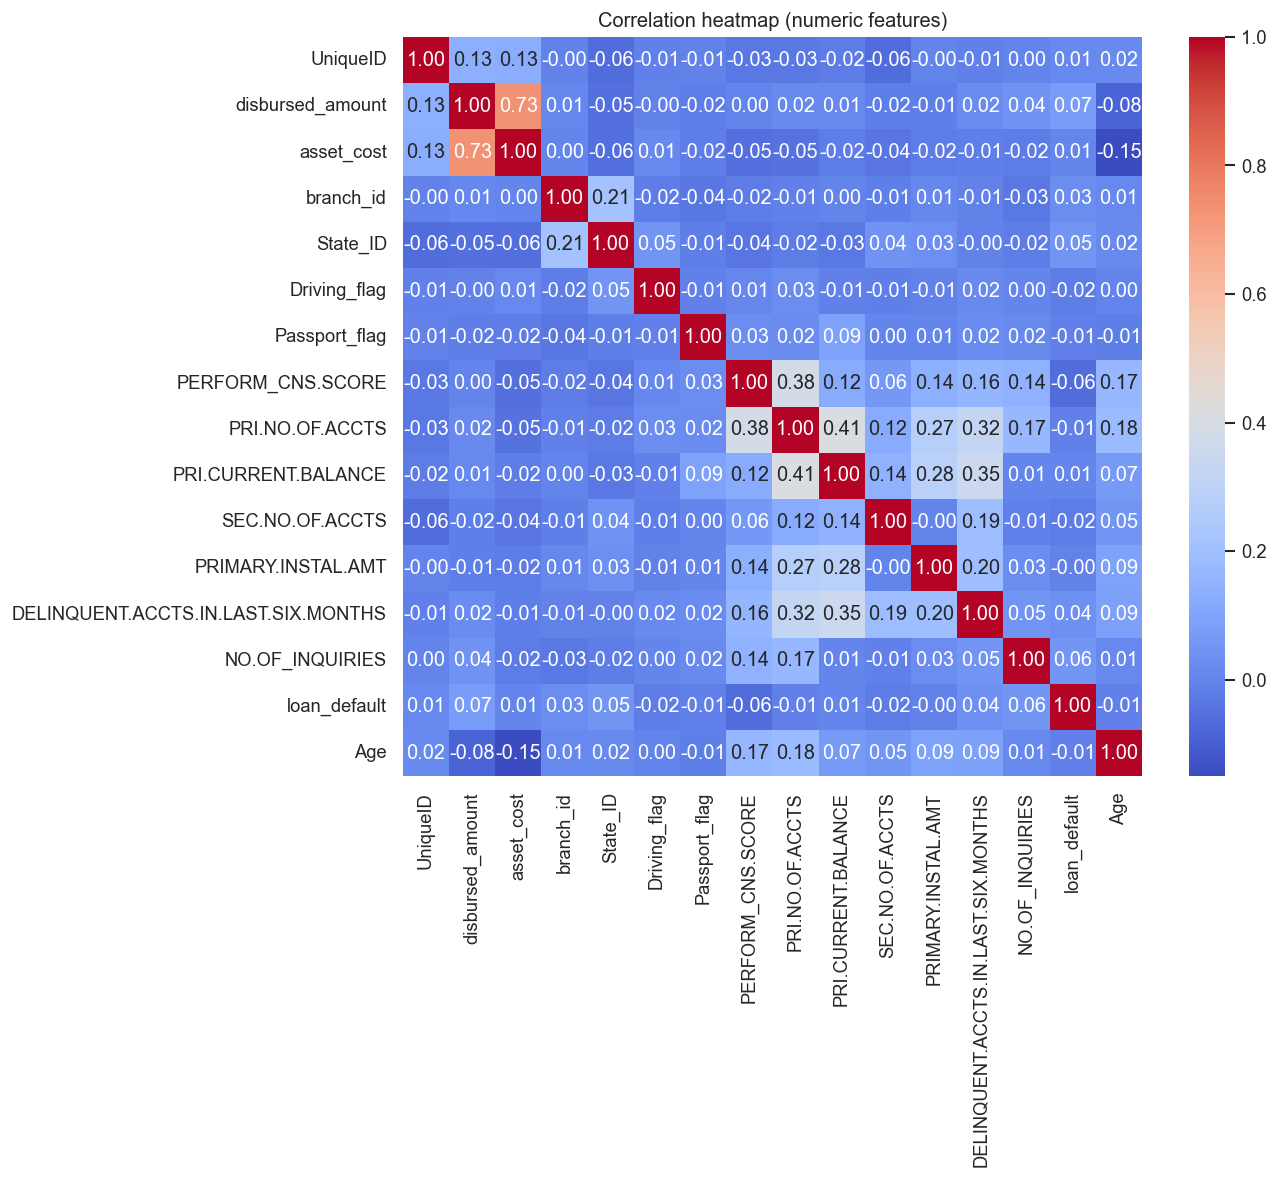

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation heatmap (numeric features)")
plt.show()

In [ ]:
# Scatter plot: Age vs PERFORM_CNS.SCORE
plt.figure(figsize=(6,5))
sns.scatterplot(x='Age', y='PERFORM_CNS.SCORE', data=df, alpha=0.5)
plt.title("Scatter: Age vs Credit Score")
plt.show()

### Outliers

I used Box plot for the attribute "Age" to see its outlier, then list those outliers along with other attributes.

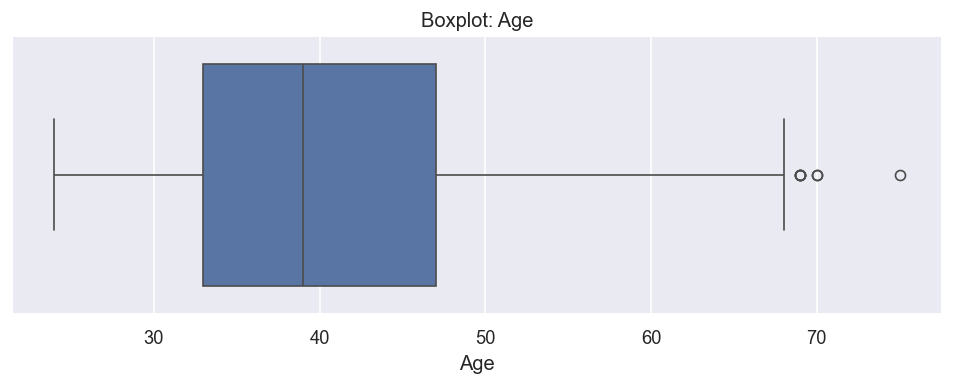

In [ ]:
plt.figure(figsize=(10,3))
sns.boxplot(x=df["Age"])
plt.title("Boxplot: Age")
plt.show()

In [ ]:
# IQR-based outlier detection function
def iqr_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return series[(series < lower) | (series > upper)]

age_outs = iqr_outliers(df['Age'].dropna())
print("Age outliers count:", age_outs.shape[0])
display(df.loc[df['Age'].isin(age_outs)])

Age outliers count: 7


,UniqueID,disbursed_amount,asset_cost,branch_id,Employment.Type,DisbursalDate,State_ID,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,PRI.CURRENT.BALANCE,SEC.NO.OF.ACCTS,PRIMARY.INSTAL.AMT,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Age,marital status,CREDIT_HISTORY_Months
647,559567,42394,70887,20,Self employed,2018-10-06,5,0,0,16,...,0,0,37567,0,10yrs 4mon,0,0,69,Single,124
1459,421361,54659,62517,67,Salaried,2018-08-04,6,0,0,836,...,0,0,0,0,1yrs 7mon,0,0,69,Married,19
1584,545222,47349,65015,9,Self employed,2018-09-28,3,0,0,0,...,0,0,0,0,0yrs 0mon,0,0,70,Single,0
1745,619084,45567,58321,62,Self employed,2018-10-25,11,0,0,0,...,0,0,0,0,0yrs 0mon,0,0,70,Divorced,0
2310,499404,50163,64141,3,Self employed,2018-09-11,1,0,0,602,...,0,1,4126,0,1yrs 1mon,0,0,69,Single,13
3018,451559,59213,72811,162,Self employed,2018-08-21,4,0,0,366,...,3179905,0,26197,1,1yrs 1mon,0,1,69,Single,13
3172,652399,33300,50816,136,NaN,2018-10-31,8,0,0,17,...,33500,0,0,0,0yrs 0mon,0,0,75,Married,0


### Bivariant Analysis

According to the correlation heatmap above, I used scatter plots to visualize pairs of highly positive or negative correlated attributes.

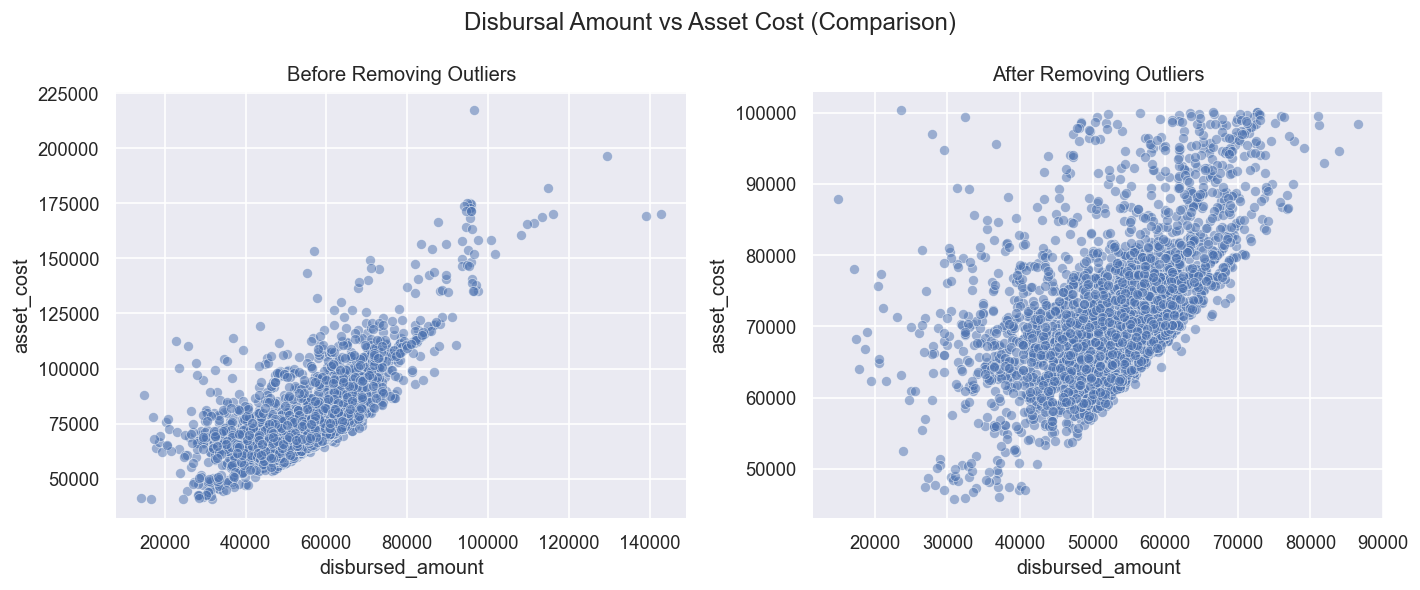

In [ ]:
xcol, ycol = 'disbursed_amount', 'asset_cost'

outliers = iqr_outliers(df[ycol])
mask = ~df[ycol].isin(outliers)

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Before (with outliers)
sns.scatterplot(x=xcol, y=ycol, data=df, alpha=0.5, ax=axes[0])
axes[0].set_title("Before Removing Outliers")

# After (outliers removed)
sns.scatterplot(x=xcol, y=ycol, data=df[mask], alpha=0.5, ax=axes[1])
axes[1].set_title("After Removing Outliers")

plt.suptitle("Disbursal Amount vs Asset Cost (Comparison)")
plt.tight_layout()
plt.show()

### Clustering

I selected some meaningful numeric features for clustering, avoiding ID and strongly skewed raw monetary amounts.

I then used the **silhouette coefficient** to determine the optimal number of clusters `k`, its score ranges from -1 to 1: values near 1 indicate well-separated clusters; near 0 indicate overlapping clusters; and below 0 suggest misclassification.

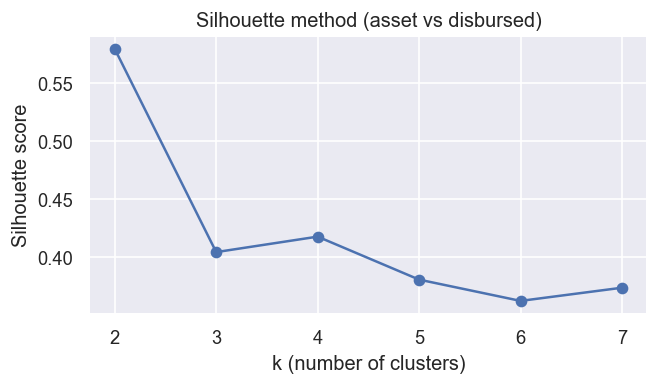

Best k = 2 score = 0.5792228326653265


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Features for simple 2D clustering
X2 = df[['asset_cost', 'disbursed_amount']].dropna()

# Standardize
scaler = StandardScaler()
X2s = scaler.fit_transform(X2)

# Silhouette scores
sil_scores_2d = {}
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X2s)
    score = silhouette_score(X2s, labels)
    sil_scores_2d[k] = score

# Plot silhouette scores
plt.figure(figsize=(6,3))
plt.plot(list(sil_scores_2d.keys()), list(sil_scores_2d.values()), marker='o')
plt.xlabel("k (number of clusters)")
plt.ylabel("Silhouette score")
plt.title("Silhouette method (asset vs disbursed)")
plt.show()

# Best k
best_k_2d = max(sil_scores_2d, key=sil_scores_2d.get)
print("Best k =", best_k_2d, "score =", sil_scores_2d[best_k_2d])


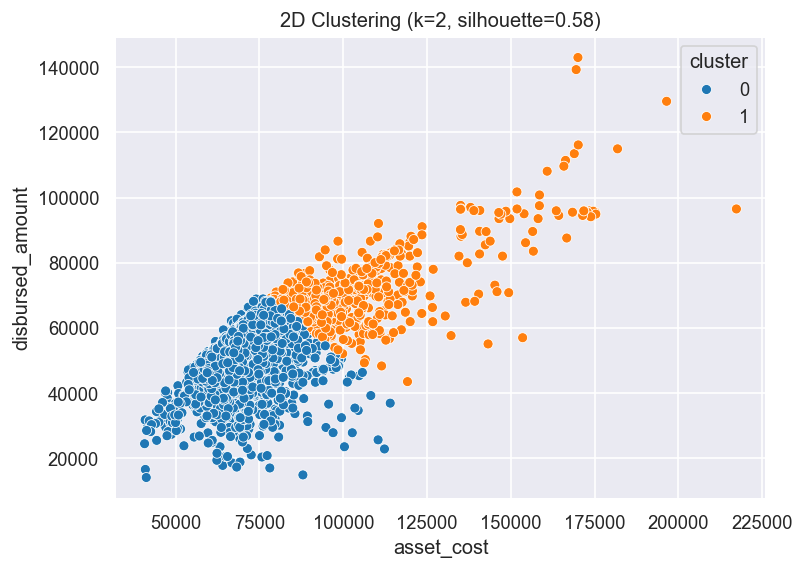

In [ ]:
# Fit final model
km = KMeans(n_clusters=best_k_2d, random_state=42, n_init=10)
labels2d = km.fit_predict(X2s)
X2['cluster'] = labels2d

plt.figure(figsize=(7,5))
sns.scatterplot(x='asset_cost', y='disbursed_amount', data=X2, hue='cluster', palette='tab10')
plt.title(f"2D Clustering (k={best_k_2d}, silhouette={sil_scores_2d[best_k_2d]:.2f})")
plt.show()

# B. Data preprocessing

## B1. Age binning
I applied:
- Equi-width binning (pd.cut)
- Equi-depth (quantile) binning (pd.qcut)
I use Sturges rule to choose the optimal number of bins

In [ ]:
import numpy as np

age = df['Age'].dropna()
n = len(age)

# Sturges
num_bins = int(np.ceil(1 + np.log2(n)))

print("Suggested bins according to Sturges rule:", num_bins)


Suggested bins according to Sturges rule: 13


In [ ]:
# num_bins = 5

# Equi-width
df['Age_equiwidth'] = pd.cut(df['Age'], bins=num_bins, labels=[f'bin{i+1}' for i in range(num_bins)], include_lowest=True)

# Equi-depth (quantiles)
age_series = df['Age'].dropna()
edges = np.quantile(age_series, np.linspace(0,1,num_bins+1))

df['Age_equidepth'] = pd.cut(df['Age'], bins=edges, labels=[f'q{i+1}' for i in range(num_bins)], include_lowest=True)


print("Age equi-width counts:")
display(df['Age_equiwidth'].value_counts().sort_index())
print("\nAge equi-depth counts:")
display(df['Age_equidepth'].value_counts().sort_index())

Age equi-width counts:


Age_equiwidth
bin1      77
bin2     579
bin3     555
bin4     446
bin5     459
bin6     349
bin7     274
bin8     244
bin9     136
bin10     84
bin11     48
bin12     12
bin13      1
Name: count, dtype: int64


Age equi-depth counts:


Age_equidepth
q1     364
q2     149
q3     270
q4     280
q5     283
q6     201
q7     229
q8     238
q9     287
q10    226
q11    277
q12    218
q13    242
Name: count, dtype: int64

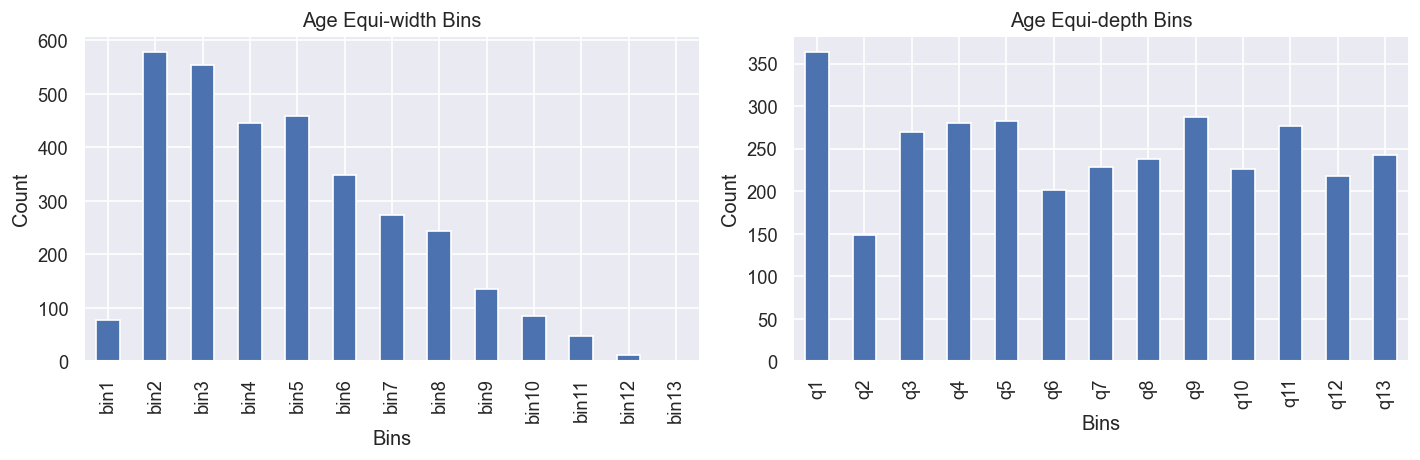

In [ ]:
# Bar charts of bin frequencies
fig, axes = plt.subplots(1, 2, figsize=(12,4))

df['Age_equiwidth'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_title("Age Equi-width Bins")
axes[0].set_xlabel("Bins")
axes[0].set_ylabel("Count")

df['Age_equidepth'].value_counts().sort_index().plot(kind='bar', ax=axes[1])
axes[1].set_title("Age Equi-depth Bins")
axes[1].set_xlabel("Bins")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


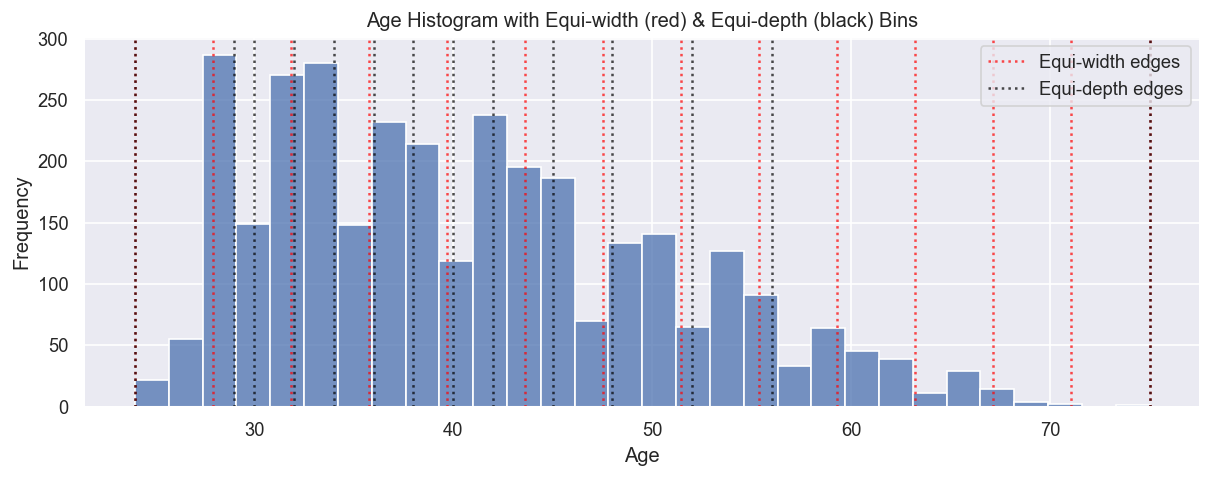

In [ ]:
# Histogram of Age with bin edges from equi-width and equi-depth binning
age_min, age_max = df['Age'].min(), df['Age'].max()
equiwidth_edges = np.linspace(age_min, age_max, num_bins+1)

age_series = df['Age'].dropna()
equidepth_edges = np.quantile(age_series, np.linspace(0, 1, num_bins+1))

plt.figure(figsize=(12,4))
sns.histplot(df['Age'], bins=30, kde=False)



# Equi-width edges
for i, edge in enumerate(equiwidth_edges):
    plt.axvline(edge, color='red', linestyle=':', alpha=0.7,
                label="Equi-width edges" if i == 0 else "")

# Equi-depth edges
for i, edge in enumerate(equidepth_edges):
    plt.axvline(edge, color='black', linestyle=':', alpha=0.7,
                label="Equi-depth edges" if i == 0 else "")

plt.legend()
plt.title("Age Histogram with Equi-width (red) & Equi-depth (black) Bins")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


The figure compares equi-width and equi-depth binning applied to ```Age```. Equi-width splits the numeric range into fixed-width bins (red dashed lines), while equi-depth ensures each bin contains an equal number of records (green dotted lines). This shows how equi-depth produces narrower bins where ages are dense (20-40) and wider bins in sparse regions (older ages).

## B2. asset_cost normalization
I created 2 following attributes:
- `asset_cost_minmax` -> Min-Max scaled to [0,1]
- `asset_cost_zscore` -> Z-score (standardized)

In [ ]:
df['asset_cost'] = pd.to_numeric(df['asset_cost'], errors='coerce')
asset_vals = df[['asset_cost']].astype(float)

# Min-max
mm = MinMaxScaler(feature_range=(0,1))
df['asset_cost_minmax'] = mm.fit_transform(asset_vals.fillna(asset_vals.median()))

# Z-score
ss = StandardScaler()
df['asset_cost_zscore'] = ss.fit_transform(asset_vals.fillna(asset_vals.median()))



print("MinMax range:", df['asset_cost_minmax'].min(), df['asset_cost_minmax'].max())
print("Z-score mean (approx):", df['asset_cost_zscore'].mean(), "std (approx):", df['asset_cost_zscore'].std())
display(df[['asset_cost','asset_cost_minmax','asset_cost_zscore']].head())


MinMax range: 0.0 1.0
Z-score mean (approx): 6.530723674265627e-17 std (approx): 1.0001532214825508


,asset_cost,asset_cost_minmax,asset_cost_zscore
0,93924,0.301338,1.002835
1,72378,0.179306,-0.203484
2,62675,0.124349,-0.746735
3,74829,0.193188,-0.066257
4,74194,0.189591,-0.101809


## B3. Discretize PERFORM_CNS.SCORE into risk categories
- Categories: Very Low Risk, Low Risk, Medium Risk, High Risk, Very High Risk  


In [ ]:
score_col = 'PERFORM_CNS.SCORE'
labels = ['Very Low Risk', 'Low Risk', 'Medium Risk', 'High Risk', 'Very High Risk']

df[score_col] = pd.to_numeric(df[score_col], errors='coerce')
sc = df[score_col].dropna()
edges = np.quantile(sc, np.linspace(0,1,6))
if len(np.unique(edges.round(8))) < len(edges):
    edges = np.linspace(sc.min(), sc.max(), 6)
df['PERFORM_SCORE_RISK_Q'] = pd.cut(df[score_col], bins=edges, labels=labels[:len(edges)-1], include_lowest=True)

# Frequency table
perform_freq = df['PERFORM_SCORE_RISK_Q'].value_counts().sort_index()
print("PERFORM score risk frequency:")
display(perform_freq)


PERFORM score risk frequency:


PERFORM_SCORE_RISK_Q
Very Low Risk     1790
Low Risk           148
Medium Risk        101
High Risk          457
Very High Risk     768
Name: count, dtype: int64

## B4. Binarize marital_status
I mapped `Married` to 1 and other values (Single, Divorced, Widowed, etc.) to 0.

In [ ]:
print("Unique marital status values:")
display(df['marital status'].value_counts(dropna=False))


# Standardize string values and map
def standardize_marital(s):
    if pd.isna(s):
        return np.nan
    s = str(s).strip().lower()
    # Normalize common variants
    if s in ['married', 'married (yes)', 'married ']:
        return 'married'
    if s in ['single', 'unmarried']:
        return 'single'
    # keep other raw text
    return s

df['marital_status_clean'] = df['marital status'].apply(standardize_marital)
df['marital_status_binary'] = df['marital_status_clean'].map(lambda x: 1 if x == 'married' else (0 if pd.notna(x) else np.nan))

display(df[['marital status','marital_status_clean','marital_status_binary']].head(10))
print("\nBinary value counts:")
display(df['marital_status_binary'].value_counts(dropna=False))


Unique marital status values:


marital status
Single      1388
Married     1072
Divorced     804
Name: count, dtype: int64

,marital status,marital_status_clean,marital_status_binary
0,Married,married,1
1,Single,single,0
2,Divorced,divorced,0
3,Single,single,0
4,Single,single,0
5,Single,single,0
6,Married,married,1
7,Single,single,0
8,Single,single,0
9,Married,married,1



Binary value counts:


marital_status_binary
0    2192
1    1072
Name: count, dtype: int64

## Save to Excel File

In [ ]:
OUTPUT_FILE = "data_preprocessing.xlsx"

with pd.ExcelWriter(OUTPUT_FILE, engine="openpyxl") as writer:
    b1_cols = ['UniqueID', 'Age', 'Age_equiwidth', 'Age_equidepth']
    df[b1_cols].to_excel(writer, sheet_name="B1_Age_Binning", index=False)

    b2_cols = ['UniqueID', 'asset_cost', 'asset_cost_minmax', 'asset_cost_zscore']
    df[b2_cols].to_excel(writer, sheet_name="B2_AssetCost_Normalization", index=False)

    b3_cols = ['UniqueID', 'PERFORM_CNS.SCORE', 'PERFORM_SCORE_RISK_Q']
    df[b3_cols].to_excel(writer, sheet_name="B3_PerformScore_Discretization", index=False)

    b4_cols = ['UniqueID', 'marital status', 'marital_status_binary']
    df[b4_cols].to_excel(writer, sheet_name="B4_MaritalStatus_Binarization", index=False)

print(f"Saved Part B deliverables into {OUTPUT_FILE}")